In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, roc_auc_score, log_loss,roc_curve, recall_score

# Read the data
train_data = pd.read_csv(r"C:\Users\beher\OneDrive\Desktop\NEW_METHOD\TRAINING_DATASET.csv")
test_data = pd.read_csv(r"C:\Users\beher\OneDrive\Desktop\NEW_METHOD\TESTING_DATASET.csv")

# Shuffle train_data and test_data
train_data = train_data.sample(frac=1, random_state=42).reset_index(drop=True)
test_data = test_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Separate features and target variable
X_train = train_data.drop(columns=["CLASS"])
y_train = train_data["CLASS"]
X_test = test_data.drop(columns=["CLASS"])
y_test = test_data["CLASS"]

# Identify categorical and numerical columns
categorical_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']
numerical_cols = [col for col in X_train.columns if col not in categorical_cols]

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Fit and transform the training data
preprocessor.fit(X_train)
X_train_encoded = preprocessor.transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_encoded.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])



from tensorflow.keras.callbacks import EarlyStopping
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, mode='max', verbose=1)
X_train_encoded_dense = X_train_encoded.toarray()

# Train the model
history = model.fit(X_train_encoded_dense, y_train, epochs=100, batch_size=32, 
                    validation_data=(X_test_encoded.toarray(), y_test), callbacks=[early_stopping])

model.save_weights('DNN_trained.weights.h5')

best_val_accuracy = max(history.history['val_accuracy'])
print("Best Validation Accuracy:", best_val_accuracy)

best_epoch = history.history['val_accuracy'].index(best_val_accuracy) + 1
print("Epoch with Best Validation Accuracy:", best_epoch)


C:\Users\beher\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5218 - loss: 0.7098 - val_accuracy: 0.7144 - val_loss: 0.6164
Epoch 2/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6722 - loss: 0.6241 - val_accuracy: 0.7453 - val_loss: 0.5637
Epoch 3/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6700 - loss: 0.6126 - val_accuracy: 0.7660 - val_loss: 0.5333
Epoch 4/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6861 - loss: 0.5933 - val_accuracy: 0.7776 - val_loss: 0.5167
Epoch 5/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7032 - loss: 0.5856 - val_accuracy: 0.7834 - val_loss: 0.5037
Epoch 6/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7125 - loss: 0.5668 - val_accuracy: 0.7930 - val_loss: 0.4903
Epoch 7/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7219 - loss: 0.5540 - val_accuracy: 0.7872 - val_loss: 0.4882
Epoch 8/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7057 - loss: 0.5638 - val_accuracy: 0.7975 - 

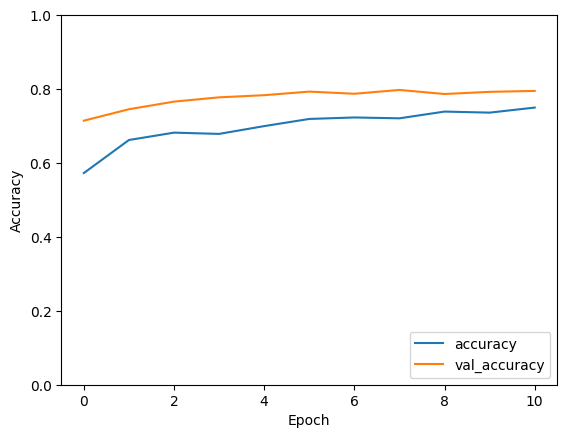

In [2]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [3]:
# Evaluate the model on test data
y_test_pred_prob = model.predict(X_test_encoded.toarray())
y_test_pred = (y_test_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred_prob)
logloss = log_loss(y_test, y_test_pred_prob)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Log Loss:", logloss)
print("Recall", recall)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)
FNR = FN / (FN + TP)
TNR = TN / (TN + FP)

print("True Positive Rate (TPR):", TPR)
print("False Positive Rate (FPR):", FPR)
print("False Negative Rate (FNR):", FNR)
print("True Negative Rate (TNR):", TNR)

49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy: 0.7949709864603481
Precision: 0.7648428405122235
F1 Score: 0.8051470588235294
ROC AUC Score: 0.8702298326887198
Log Loss: 0.4738717324101161
Recall 0.8499353169469599
Confusion Matrix:
[[576 202]
 [116 657]]
True Positive Rate (TPR): 0.8499353169469599
False Positive Rate (FPR): 0.2596401028277635
False Negative Rate (FNR): 0.1500646830530401
True Negative Rate (TNR): 0.7403598971722365


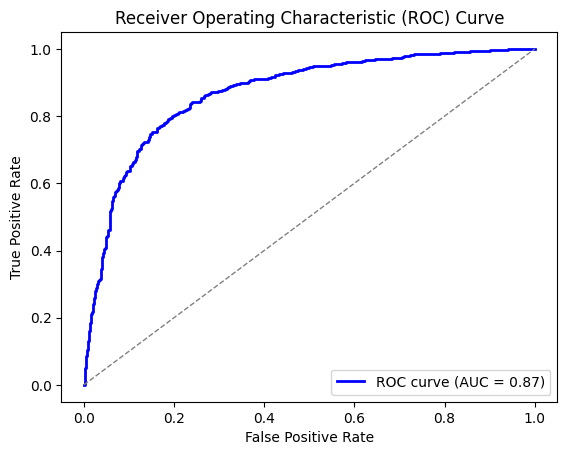

In [4]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_prob)
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Confusion Matrix:
[[576 202]
 [116 657]]


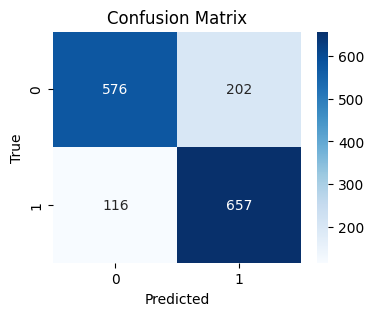

In [6]:
import seaborn as sns
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(4, 3))  # Adjust the figsize as needed
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [17]:
new_data = pd.read_csv(r"C:\Users\beher\OneDrive\Desktop\NEW_METHOD\NEW_TESTING.csv")
X_new_encoded = preprocessor.transform(new_data)
y_pred_prob_new = model.predict(X_new_encoded.toarray())  # Convert to dense array for prediction

prob_df = pd.DataFrame(y_pred_prob_new, columns=['Probability'])

new_data_with_prob = pd.concat([new_data, prob_df], axis=1)

new_data_with_prob.to_csv('dnn_predictions_with_probabilities.csv', index=False)


24384/24384 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step


In [19]:
pip install graphviz



   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   -------- ------------------------------- 10.2/47.1 kB ? eta -:--:--
   ---------------------------------- ----- 41.0/47.1 kB 495.5 kB/s eta 0:00:01
   ---------------------------------------- 47.1/47.1 kB 472.9 kB/s eta 0:00:00


In [20]:
pip install pydot


Note: you may need to restart the kernel to use updated packages.


C:\Users\beher\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


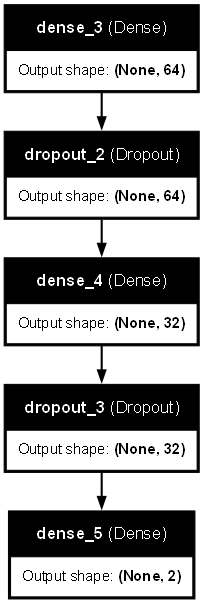

In [8]:
from keras.utils import plot_model
import pydot

# Define your model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_encoded.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(2, activation='softmax')  # Two output neurons with softmax activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Visualize the model architecture as a network graph
plot_model(model, to_file='model_network.png', show_shapes=True, show_layer_names=True, dpi=75)


In [9]:
# Assuming `model` is your constructed CNN model
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │           4,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,010 (27.38 KB)

 Trainable params: 7,010 (27.38 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
new_data = pd.read_csv(r"C:\Users\beher\OneDrive\Desktop\NEW_METHOD\ls_merge_data.csv")
X_new_encoded = preprocessor.transform(new_data)
y_pred_prob_new = model.predict(X_new_encoded.toarray())  # Convert to dense array for prediction

prob_df = pd.DataFrame(y_pred_prob_new, columns=['Probability'])

new_data_with_prob = pd.concat([new_data, prob_df], axis=1)

new_data_with_prob.to_csv('dnnLS_predictions_with_probabilities.csv', index=False)

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
